# Introduction

In this project, **George Oghenemega** analyzes the provided insurance data and builds predictive models to determine the probability of a house having at least one insurance claim within a specified period.

## Project Overview

Mega has been appointed as the lead data analyst to build a predictive model to determine if a building will have an insurance claim during a certain period or not.

She hopes to achieve this through data cleaning and pre-processing, exploratory data analysis and visualizations and finally building models that actually work.

In [1]:
#Import libraries for data analysis and visualizations

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load and preview data

df = pd.read_csv("train_data.csv")

#About the data
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.3+ KB
None
(7160, 14)


In [3]:
#Display first five rows
print(df.head())

  Customer Id  YearOfObservation  Insured_Period  Residential  \
0      H14663               2013             1.0            0   
1       H2037               2015             1.0            0   
2       H3802               2014             1.0            0   
3       H3834               2013             1.0            0   
4       H5053               2014             1.0            0   

  Building_Painted Building_Fenced Garden Settlement  Building Dimension  \
0                N               V      V          U               290.0   
1                V               N      O          R               490.0   
2                N               V      V          U               595.0   
3                V               V      V          U              2840.0   
4                V               N      O          R               680.0   

   Building_Type  Date_of_Occupancy NumberOfWindows Geo_Code  Claim  
0              1             1960.0               .     1053      0  
1           

In [4]:
#Check for data types in each column
print(df.dtypes.to_string())

#Fix data types

#Date of occupancy should be int data type
df["Date_of_Occupancy"] = df["Date_of_Occupancy"].astype("Int64")

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted       object
Building_Fenced        object
Garden                 object
Settlement             object
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code               object
Claim                   int64


In [5]:
#From the variable description document we know that some object dtypes are actually categorical
#Check for unique values in categorical columns

categories = df.select_dtypes(include=['object']).columns
for col in categories:
    print(f"Unique values are: {col}: {df[col].unique()}")

Unique values are: Customer Id: ['H14663' 'H2037' 'H3802' ... 'H6204' 'H6537' 'H7470']
Unique values are: Building_Painted: ['N' 'V']
Unique values are: Building_Fenced: ['V' 'N']
Unique values are: Garden: ['V' 'O' nan]
Unique values are: Settlement: ['U' 'R']
Unique values are: NumberOfWindows: ['   .' '4' '3' '2' '5' '>=10' '6' '7' '9' '8' '1']
Unique values are: Geo_Code: ['1053' '1143' '1160' ... '2B096' '2B353' nan]


In [6]:
#Number of windows is supposed to be a numerical column but it is currently an object type. .
#Replace (.) with np.nan and >=10 with "10", assuming that was the intended entry 

df["NumberOfWindows"] = df["NumberOfWindows"].replace({"   .": np.nan, ">=10": "10"})

#Then fix the data type of the column
df["NumberOfWindows"] = pd.to_numeric(df["NumberOfWindows"], errors='coerce')
df["NumberOfWindows"] = df["NumberOfWindows"].astype("Int64")

In [7]:
#Check for missing values
print(df.isnull().sum().to_string())

#Fill missing values in geo code
df["Geo_Code"] = df["Geo_Code"].fillna("Unknown")

# Fill garden
df["Garden"] = df["Garden"].fillna("Unknown")

Customer Id              0
YearOfObservation        0
Insured_Period           0
Residential              0
Building_Painted         0
Building_Fenced          0
Garden                   7
Settlement               0
Building Dimension     106
Building_Type            0
Date_of_Occupancy      508
NumberOfWindows       3551
Geo_Code               102
Claim                    0


In [8]:
#Fill other missing columns (numerical) using median inputation (excluding the number of windows column)

missing = df[['Building Dimension', 'Date_of_Occupancy', 'NumberOfWindows']]
for col in missing:
    if col != 'NumberOfWindows':  # Exclude this column
        if df[col].isnull().any():  # Check if column has missing values
            median_value = df[col].median()
            df[col] = df[col].fillna(median_value)
            
# Handle Number Of Windows separately
if 'NumberOfWindows' in missing and df['NumberOfWindows'].isnull().any():

    # Create missing flag
    df['Missing Number Of Windows'] = df['NumberOfWindows'].isnull().astype(int)

    # Fill with special value
    df['NumberOfWindows'] = df['NumberOfWindows'].fillna(999)
    
    #Verify that there are no more missing values
    print(df.isnull().sum())

Customer Id                  0
YearOfObservation            0
Insured_Period               0
Residential                  0
Building_Painted             0
Building_Fenced              0
Garden                       0
Settlement                   0
Building Dimension           0
Building_Type                0
Date_of_Occupancy            0
NumberOfWindows              0
Geo_Code                     0
Claim                        0
Missing Number Of Windows    0
dtype: int64


In [9]:
#Check for duplicates
print(df.duplicated().sum())

0


# Visualizing The Data

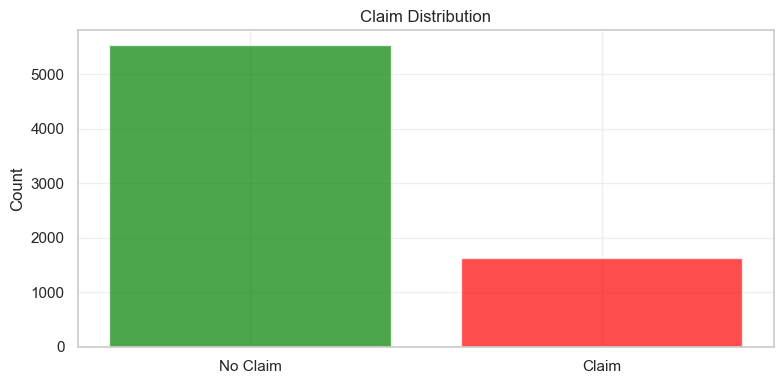

In [10]:
#Set up the visualization style
sns.set(style="whitegrid")

#Display target variable distributions

counts = df["Claim"].value_counts()
percent = counts/len(df["Claim"] * 100)

#Plot the visuals
plt.figure(figsize=(8, 4))
bars = plt.bar(['No Claim', 'Claim'], counts.values, color=['green', 'red'], alpha=0.7)
plt.title("Claim Distribution")
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [11]:
#Feature importance
#Check columns to see which ones have direct correlation to the target variale

feature_cols = df.select_dtypes(include=[np.number]).columns.tolist()
#Excluding claim 
feature_cols = [col for col in feature_cols if col != "Claim" ]

#Calculatete correlations
correlations = []
for col in feature_cols:
    if col in df.columns:
        valid = df[[col, "Claim"]].dropna()
        if len(valid) > 10:  
            corr = valid.corr().iloc[0, 1]
            correlations.append({
                'Feature': col,
                'Correlation': corr,
                'Abs_Correlation': abs(corr),
                'Samples': len(valid)
            })

corr_df = pd.DataFrame(correlations).sort_values('Abs_Correlation', ascending=False)

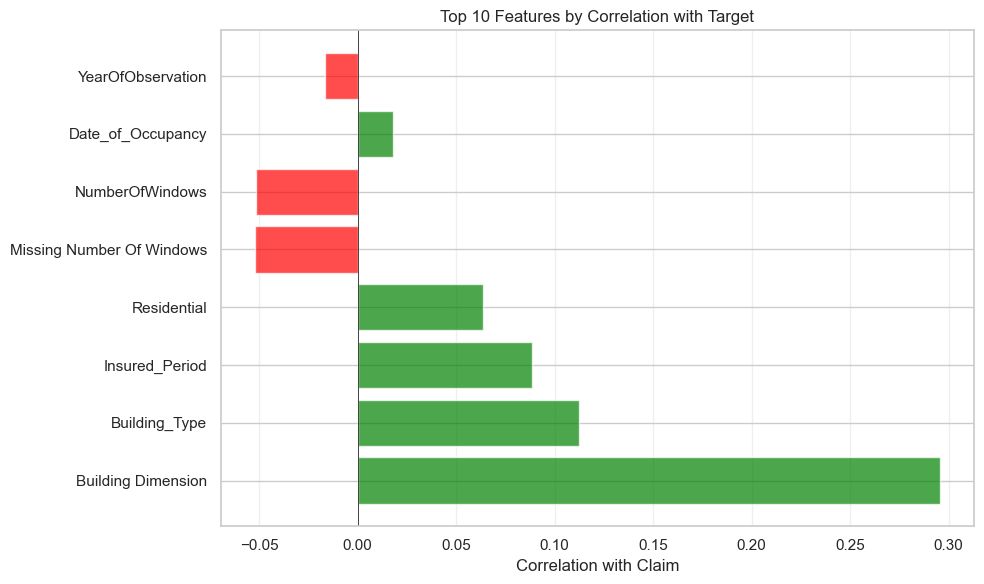

In [12]:

# Simple correlation bar chart
plt.figure(figsize=(10, 6))
top_features = corr_df.head(10)
colors = ['red' if x < 0 else 'green' for x in top_features['Correlation']]
bars = plt.barh(range(len(top_features)), top_features['Correlation'], color=colors, alpha=0.7)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Correlation with Claim')
plt.title('Top 10 Features by Correlation with Target')
plt.grid(True, alpha=0.3, axis='x')
plt.axvline(x=0, color='black', linewidth=0.5)
plt.tight_layout()
plt.show()

# 
Data Pre-Processing for Modelling

In [13]:
#dropping unwanted columns

df = df.drop(columns=['Geo_Code'])
df = df.drop(columns =["Customer Id"])

#Up next we wil convert category dtype columns into numeric using one-hot encoding
categorical_cols = df.select_dtypes(include=['category', 'object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Verify no string columns remain
string_cols = [col for col in df.columns if df[col].dtype == 'object']
print(string_cols)

#print(df.head())

[]


In [14]:
#Pre processing imports

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [15]:
#Seperate data into features and target variable

x = df.drop(columns=["Claim"])
y = df["Claim"]

#Split data into training and testing sets while preserving the class distribution
X_train, X_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Preserve class distribution
)

In [16]:
#Scaling the data 

#Make copies of the data
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

numerical = [
    'YearOfObservation', 'Residential', 'Insured_Period',
    'Building Dimension', 'NumberOfWindows', 
    'Building_Type', 'Date_of_Occupancy'
]

scaler = StandardScaler()

# Fit on training data only, then transform both
X_train_scaled[numerical] = scaler.fit_transform(X_train[numerical])
X_test_scaled[numerical] = scaler.transform(X_test[numerical])

# Building The Models

The requirements of this task primarily revolve around the ability of the model to **classify** a building as one which either has or does not have claim. 
For this reason, I would be working with the random forest classifier and the logistic regression models to determine which model would yield a better probabilistic result.

The key metric for evaluating this model would be the **roc_auc** and the supportig metrics would be the precision, recall and f1 scores.

In [17]:
#Logistic regression 
from sklearn.linear_model import LogisticRegression

basic = LogisticRegression(
    random_state=42, 
    max_iter=1000, 
    class_weight = 'balanced',
)

basic.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [18]:
#Make predictions on the test set

y_pred = basic.predict(X_test_scaled)
y_pred_proba = basic.predict_proba(X_test_scaled)[:, 1]

In [19]:
#Model Evaluation
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, classification_report

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC_AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1: {f1_score(y_test, y_pred):.4f}")

print(classification_report(y_test, y_pred, target_names=['No Claim', 'Claim']))

Accuracy: 0.6997
ROC_AUC: 0.6884
Precision: 0.3843
Recall: 0.5229
F1: 0.4430
              precision    recall  f1-score   support

    No Claim       0.84      0.75      0.79      1105
       Claim       0.38      0.52      0.44       327

    accuracy                           0.70      1432
   macro avg       0.61      0.64      0.62      1432
weighted avg       0.74      0.70      0.71      1432



In [20]:
#Let's do hyperparameter tuning to try and improve model performance

param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1], 
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': ['balanced', {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}]
}

In [21]:
# Perform grid search based on best roc value
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    basic,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Best CV score: 0.7207


In [22]:
#Evaluate tuned model 

#Get best model
best_model = grid_search.best_estimator_

#Make predictions
y_pred_best = best_model.predict(X_test_scaled)
y_pred_proba_best = best_model.predict_proba(X_test_scaled)[:, 1]

#Results
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"ROC_AUC: {roc_auc_score(y_test, y_pred_proba_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.4f}")
print(f"F1: {f1_score(y_test, y_pred_best):.4f}")

Accuracy: 0.6927
ROC_AUC: 0.6867
Precision: 0.3790
Recall: 0.5413
F1: 0.4458


In [23]:
#Trying random forest since logistic regression didnt yield a sufficient enough resultandom forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1  # Use all CPU cores
)

# Train
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [24]:
# Predict
y_pred_rf = rf.predict(X_test_scaled)
y_pred_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

In [25]:
#Evaluate model

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"ROC_AUC: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1: {f1_score(y_test, y_pred_rf):.4f}")

print(classification_report(y_test, y_pred_rf, target_names=['No Claim', 'Claim']))


Accuracy: 0.7577
ROC_AUC: 0.6629
Precision: 0.4462
Recall: 0.2538
F1: 0.3236
              precision    recall  f1-score   support

    No Claim       0.80      0.91      0.85      1105
       Claim       0.45      0.25      0.32       327

    accuracy                           0.76      1432
   macro avg       0.63      0.58      0.59      1432
weighted avg       0.72      0.76      0.73      1432



In [26]:
#Try hyperparameter tuning 
# Define parameter distributions

params = {
    'n_estimators': [100, 200, 281, 300, 350, 400, 600],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [3, 8, 10, 12, 15, 20, 25],
    'min_samples_leaf': [1, 2, 3, 4, 5, 7, 8, 10],
    'max_features': ['sqrt', 'log2', 0.3, 0.7],

    'class_weight': ['balanced', {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, 'balanced_subsample'],
    'random_state': [42]
}

In [ ]:
#Perform random search on roc value 

from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params,
    n_iter=60,
    scoring='roc_auc',  # Primary: ROC-AUC
    cv=5,  n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the random search
random_search.fit(X_train_scaled, y_train)

# Results

print(f"Best Parameters:")
for param, value in random_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"Best ROC-AUC Score (CV): {random_search.best_score_:.4f}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [ ]:
# Evaluate on test set

best_rf_model = random_search.best_estimator_

# Get predictions
y_pred_proba_brf = best_rf_model.predict_proba(X_test_scaled)[:, 1]
y_pred_brf = best_rf_model.predict(X_test_scaled)

# Calculate metrics

print(f"TEST SET PERFORMANCE:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_brf):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_brf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_brf, zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_brf, zero_division=0):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_brf, zero_division=0):.4f}")

## Conclusion 

This project has been able to run through a basic machine learning pipeline and the results of the models trained so far, although not impressive are expected for the kind of data that was given. I look forward to corrections and remodelling once I understand these concepts better.